## Домашняя работа

Hard
Необходимо вынести лучшую модель в отдельный скрипт:

Скрипт должен подгружать уже обученную модель (то есть модель делает только предсказания на данных)
Скрипт должен принимать путь до csv файла с данными для предсказания
Скрипт должен принимать путь до файла куда будут складываться ответы
Рекомендации к выполнению задания:

Необходимо найти информацию как сохранять и подгружать обученную модель sklearn
Необходимо найти информацию как делать скрипты в python с параметрами (попробуйте библиотеку click)
Запуск скрипта должен выглядеть следующим образом "python best_model.py --path_to_data 'data_for_prediction.csv' --path_to_prediction 'predictions.csv"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mlxtend.plotting import category_scatter, plot_decision_regions
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_validate, cross_val_score
import scipy.stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#### Easy
Взять датасет с kaggle https://www.kaggle.com/datasets/uciml/iris и обучить на нем дерево решений с перебором параметров с помощью grid search. Вывести метрики качества accuracy ,presicion, recall, F1-score для лучшей модели.

In [2]:
iris = pd.read_csv(r'D:\Курсы Питон\Iris.csv', sep=',')
iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [3]:
iris_X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] = (iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] - iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].mean()) / iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].std()

In [4]:
iris_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593


In [5]:
x_train, x_test, y_train, y_test = train_test_split(iris_X, iris['Species'], train_size=0.8)

In [6]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range (1, 20, 1),
    'min_samples_leaf': range (1, 8),
    'min_samples_split': range (2, 10, 2)
}

In [9]:
Iris_bptree = GridSearchCV(DecisionTreeClassifier(), params)
Iris_bptree.fit(x_train, y_train)
Iris_bptree.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [10]:
model_iris = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=2, min_samples_leaf=3)
model_iris.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)

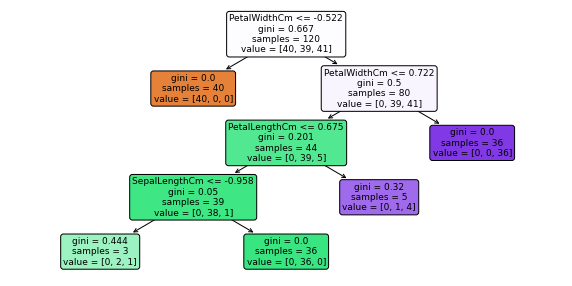

In [11]:
plt.figure(figsize=(10,5))  
plot_tree(model_iris, feature_names = x_test.columns, 
             filled=True, fontsize=9, rounded = True)
plt.show()

In [12]:
metrics_train = {'accuracy':[], 'precision_weighted':[],'recall_weighted':[],'f1_weighted':[]}
for i in metrics_train:
   metrics_train[i].append(cross_val_score(model_iris, x_train, y_train, cv=5, scoring = i))
metrics_train

{'accuracy': [array([1.        , 0.91666667, 1.        , 0.95833333, 1.        ])],
 'precision_weighted': [array([1.        , 0.91666667, 1.        , 0.96296296, 1.        ])],
 'recall_weighted': [array([1.        , 0.95833333, 1.        , 0.95833333, 1.        ])],
 'f1_weighted': [array([1.        , 0.95816993, 1.        , 0.95816993, 1.        ])]}

In [14]:
test_prediction = model_iris.predict(x_test)
test_accuracy = accuracy_score(test_prediction, y_test)
test_precision = precision_score(test_prediction, y_test, average='weighted')
test_recall = recall_score(test_prediction, y_test, average='weighted')
test_f1 = f1_score(test_prediction, y_test, average='weighted')

print('Метрики модели на тестовой выборке: ', test_accuracy, test_precision, test_recall, test_f1)

Метрики модели на тестовой выборке:  0.9333333333333333 0.9454545454545454 0.9333333333333333 0.9333333333333333


In [15]:
from sklearn.metrics import classification_report

report = classification_report(y_test, model_iris.predict(x_test))
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.82      0.90        11
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30



## Medium
Провести полноценное исследование:
1) Визуализировать данные (провести EDA)

2) Если требуется, подготовить данные к обучению модели

3) Обучить 4 различные модели классификации, посчитать accuracy ,presicion, recall, F1-score для каждой модели

4) Проверить действительно ли есть статистическое различие между метриками качества моделей

5) Выбрать лучшую модель

In [16]:
iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,-0.897674,1.028611,-1.336794,-1.308593,Iris-setosa
1,2,-1.139200,-0.124540,-1.336794,-1.308593,Iris-setosa


###### Проверка на мультиколлениарность в датасете и визуализация

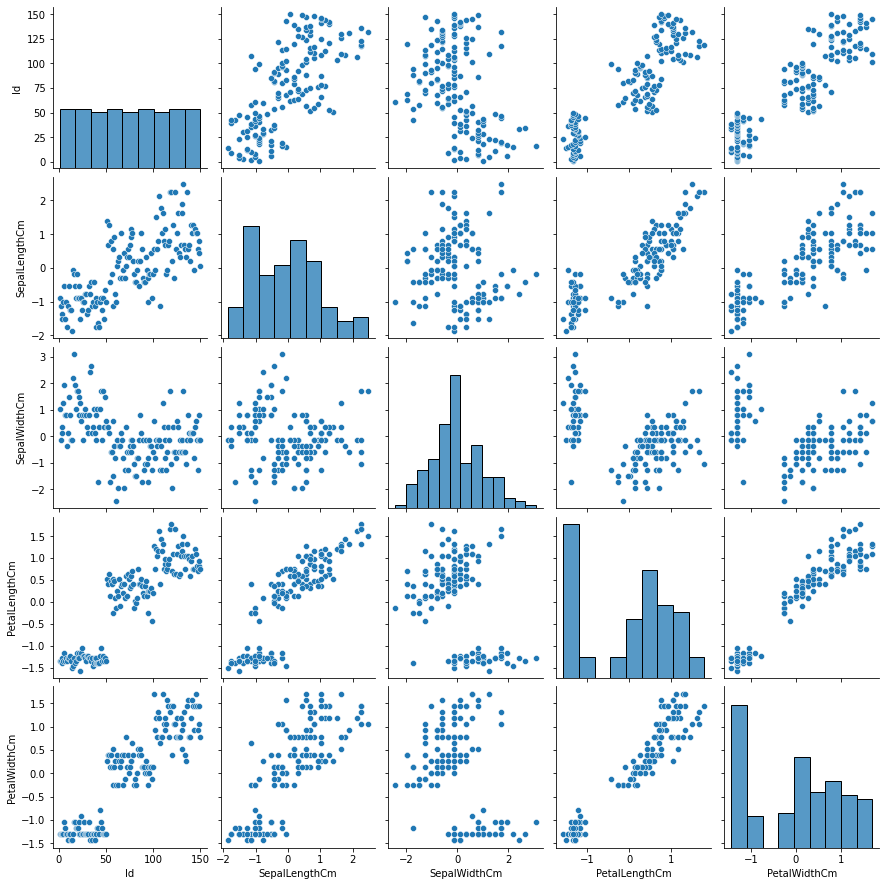

In [17]:
sns.pairplot(iris)

In [19]:
iris_corr = iris.corr()
iris_corr[(np.abs(iris_corr) > 0.9)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.0,NaN,NaN,NaN,NaN
SepalLengthCm,NaN,1.0,NaN,NaN,NaN
SepalWidthCm,NaN,NaN,1.0,NaN,NaN
PetalLengthCm,NaN,NaN,NaN,1.000000,0.962757
PetalWidthCm,NaN,NaN,NaN,0.962757,1.000000


Корреляционный анализ показывает, что признак PetalLengthCm сильно зависит от PetalWidthCm и SepalLengthCm.
На основании этого необходимо удалить данный признак из набора данных для построения моделей.

In [20]:
iris2 = iris.drop(columns=['PetalLengthCm'])
iris2

,Id,SepalLengthCm,SepalWidthCm,PetalWidthCm,Species
0,1,-0.897674,1.028611,-1.308593,Iris-setosa
1,2,-1.139200,-0.124540,-1.308593,Iris-setosa
2,3,-1.380727,0.336720,-1.308593,Iris-setosa
3,4,-1.501490,0.106090,-1.308593,Iris-setosa
4,5,-1.018437,1.259242,-1.308593,Iris-setosa
...,...,...,...,...,...
145,146,1.034539,-0.124540,1.443121,Iris-virginica
146,147,0.551486,-1.277692,0.918985,Iris-virginica
147,148,0.793012,-0.124540,1.050019,Iris-virginica
148,149,0.430722,0.797981,1.443121,Iris-virginica


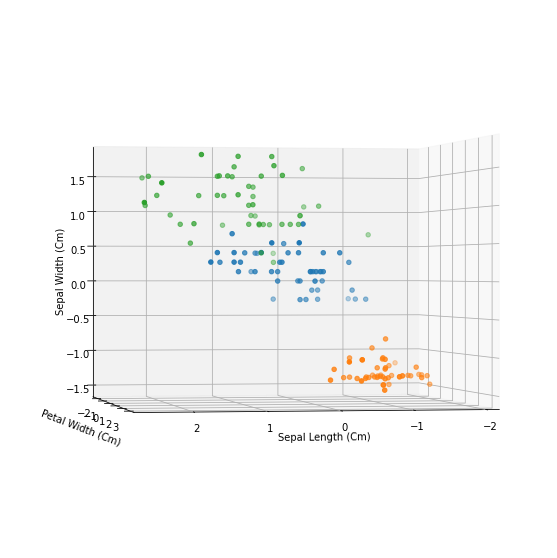

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(projection = '3d')

for sp in list(set(iris2.Species)):
    x = iris2[(iris2["Species"] == sp)].SepalLengthCm
    y = iris2[(iris2["Species"] == sp)].SepalWidthCm
    z = iris2[(iris2["Species"] == sp)].PetalWidthCm
    ax.scatter(x, y, z)

ax.set_xlabel('Sepal Length (Cm)')
ax.set_zlabel('Sepal Width (Cm)')
ax.set_ylabel('Petal Width (Cm)')
ax.view_init(0, 80)

##### Нормализация данных и разделение датасета на обучающую и тестовую выборки

In [22]:
X = iris2[['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']]
Y = iris2['Species']
X = (X - X.mean()) / X.std()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

##### Построение нескольких моделей: 1) логистическая регрессиия, 2) решающее дерево, 3) случайный лес c 10 деревьями, 4) случайный лес c 1000 деревьев

In [24]:
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)
sample1 = cross_validate(lr, X_train, Y_train, scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'], cv=10)
report1 = classification_report(Y_test, lr.predict(X_test))

dt = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=2, min_samples_leaf=3)
dt.fit(X_train, Y_train)
sample2 = cross_validate(dt, X_train, Y_train, scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'], cv=10)
report2 = classification_report(Y_test, dt.predict(X_test))

rf10 = RandomForestClassifier(n_estimators=10)
rf10.fit(X_train, Y_train)
sample3 = cross_validate(rf10, X_train, Y_train, scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'], cv=10)
report3 = classification_report(Y_test, rf10.predict(X_test))

rf1000 = RandomForestClassifier(n_estimators=1000)
rf1000.fit(X_train, Y_train)
sample4 = cross_validate(rf1000, X_train, Y_train, scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'], cv=10)
report4 = classification_report(Y_test, rf1000.predict(X_test))

In [25]:
F1_lr = cross_val_score(lr, X_train, Y_train, cv=10)
F1_dt = cross_val_score(dt, X_train, Y_train, cv=10)
F1_rf10 = cross_val_score(rf10, X_train, Y_train, cv=10)
F1_rf1000 = cross_val_score(rf1000, X_train, Y_train, cv=10)

In [26]:
from scipy import stats
F, p = stats.f_oneway(F1_lr, F1_dt, F1_rf10, F1_rf1000) # однофакторный дисперсионный анализ
F_test = stats.f.ppf((1-0.05), 4, 15)
F, p

(0.12597200622083973, 0.9441178018089919)

Различия между четырьмя моделями статистически незначимы.

## Hard
Необходимо вынести лучшую модель в отдельный скрипт:

Скрипт должен подгружать уже обученную модель (то есть модель делает только предсказания на данных).
Скрипт должен принимать путь до csv файла с данными для предсказания.
Скрипт должен принимать путь до файла куда будут складываться ответы.

Рекомендации к выполнению задания:
Необходимо найти информацию как сохранять и подгружать обученную модель sklearn.
Необходимо найти информацию как делать скрипты в python с параметрами (попробуйте библиотеку click)
Запуск скрипта должен выглядеть следующим образом "python best_model.py --path_to_data 'data_for_prediction.csv' --path_to_prediction 'predictions.csv"

In [27]:
import joblib

joblib.dump (rf10, r'D:\Курсы Питон\rf10.py') # сохранение модели, joblib.load - скачать

['D:\\Курсы Питон\\rf10.py']

In [28]:
X_test.to_csv(r'D:\Курсы Питон\data_for_prediction.csv') # создание csv-файла с тестовой выборкой

In [31]:
X_train = pd.read_csv(r'D:\Курсы Питон\data_for_prediction.csv')
X_train['ID']=X_train['Unnamed: 0']
X_train.head(2)

,Unnamed: 0,SepalLengthCm,SepalWidthCm,PetalWidthCm,ID
0,3,-1.501490,0.10609,-1.308593,3
1,116,0.793012,-0.12454,0.787951,116


In [32]:
Best_model = joblib.load(r'D:\Курсы Питон\rf10.py')
X_test = pd.read_csv(r'D:\Курсы Питон\data_for_prediction.csv')
X_test['ID']=X_test['Unnamed: 0']
pred = Best_model.predict(X_test[['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']])
pred = pd.DataFrame(pred,columns=["IrisSpecies"])
sub = pd.concat([X_test['ID'], pred],axis=1)
sub.set_index('ID',inplace=True)
sub.to_csv(f"D:\Курсы Питон\predictions.csv")

#### С этим пока не разобралась
Необходимо найти информацию как делать скрипты в python с параметрами (попробуйте библиотеку click) Запуск скрипта должен выглядеть следующим образом "python best_model.py --path_to_data 'data_for_prediction.csv' --path_to_prediction 'predictions.csv"